In [10]:
import numpy as np
import matplotlib.pyplot as plt

from deepexplain.tensorflow import DeepExplain

from keras.datasets import cifar10
from keras.models import load_model
from keras.models import Model
from keras.utils import to_categorical
from keras import backend as K

import sys
sys.path.append('../Final_notebook/')
import proj_utils as utils
from visualization_lib import Visualize

In [22]:
# From DeepExplain attribution notebook
def deepexplain(img, label, model, method='intgrad'):
    """
    # Arguments
        img:
        label: should be onehot v
    """
    with DeepExplain(session=K.get_session()) as de:  # <-- init DeepExplain context
        # 1. Get the input tensor to the original model
        input_tensor = model.layers[0].input

        # 2. We now target the output of the last dense layer (pre-softmax)
        # To do so, create a new model sharing the same layers untill the last dense (index -2)
        fModel = Model(inputs=input_tensor, outputs = model.layers[-2].output)
        target_tensor = fModel(input_tensor)

        #xs = img.reshape(1, 299, 299, 3)
        #ys = np.array([label])

        attributions = de.explain(method, target_tensor * label, input_tensor, img)
        
    return attributions

In [7]:
model = load_model('../Saved_models/good_models/cifar10/cifar10_vgg_like_175.h5')

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

y_test_tmp = np.squeeze(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

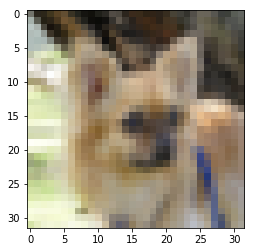

In [19]:
i = 421
img = x_test[[i]]
label = y_test[[i]]
plt.imshow(img[0])

In [47]:
utils.decode_cifar10_preds(model.predict(img))

[[('dog', 0.99855655), ('cat', 0.0011238615), ('horse', 0.00014931468)]]

In [48]:
att = deepexplain(img, label, model)[0]
#att = att.mean(axis=-1)
att = att.sum(axis=-1)

DeepExplain: running "intgrad" explanation method (3)
Model with multiple inputs:  False


In [49]:
th = max(abs(att.min()), abs(att.max()))

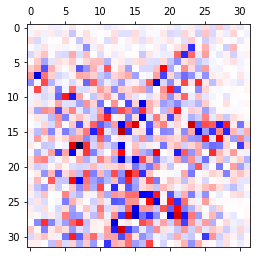

In [51]:
plt.matshow(att, vmin=-th, vmax=th, cmap='seismic')

In [52]:
Visualize(att, img[0], overlay=True, morphological_cleanup=True,
                     clip_above_percentile=95, clip_below_percentile=10)

IndexError: tuple index out of range

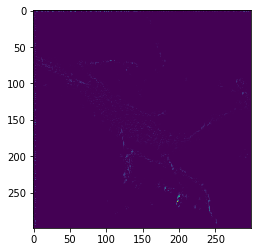

In [140]:
tmp = tmp.mean(axis=2)
tmp = np.maximum(tmp, 0)
tmp /= tmp.max()
plt.imshow(tmp)

In [101]:
tmp = tmp.mean(axis=2)
scale = 1.0 / tmp.max()
tmp = tmp * scale

In [104]:
tmp = (tmp.copy() > 0.).astype(int)

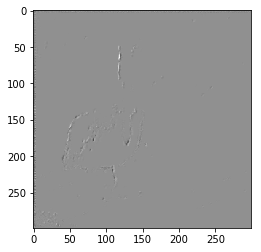

In [115]:
plt.imshow(tmp, cmap='gray')

In [13]:
tmp = np.mean(tmp, -1)

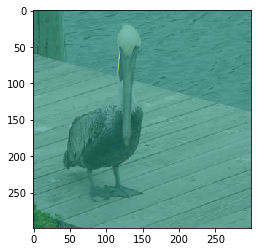

In [116]:
plt.imshow(img)
plt.imshow(tmp, alpha=0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


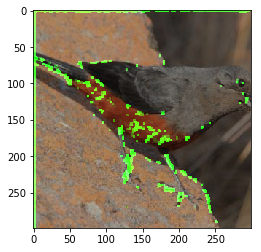

In [139]:
plt.imshow(Visualize(tmp, img, overlay=True, morphological_cleanup=True,
                     clip_above_percentile=95, clip_below_percentile=10))

In [88]:
Visualize(tmp, img, clip_above_percentile=95, clip_below_percentile=55, overlay=True).max()

128.09568625688553